In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/drive/MyDrive/bài tập colab/CSV/house_price_Dống-Da_Hà-Nội_subdata.csv')

In [25]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               615 non-null    float64
 1   price              617 non-null    float64
 2   postDate           617 non-null    int64  
 3   land_certificate   359 non-null    object 
 4   house_direction    41 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             237 non-null    float64
 7   bedroom            316 non-null    float64
 8   floor              357 non-null    float64
 9   lat                617 non-null    float64
 10  long               617 non-null    float64
 11  property_type      617 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 62.7+ KB


In [10]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [11]:
df.isna().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

In [21]:
# df.dropna(subset='price',inplace=True)

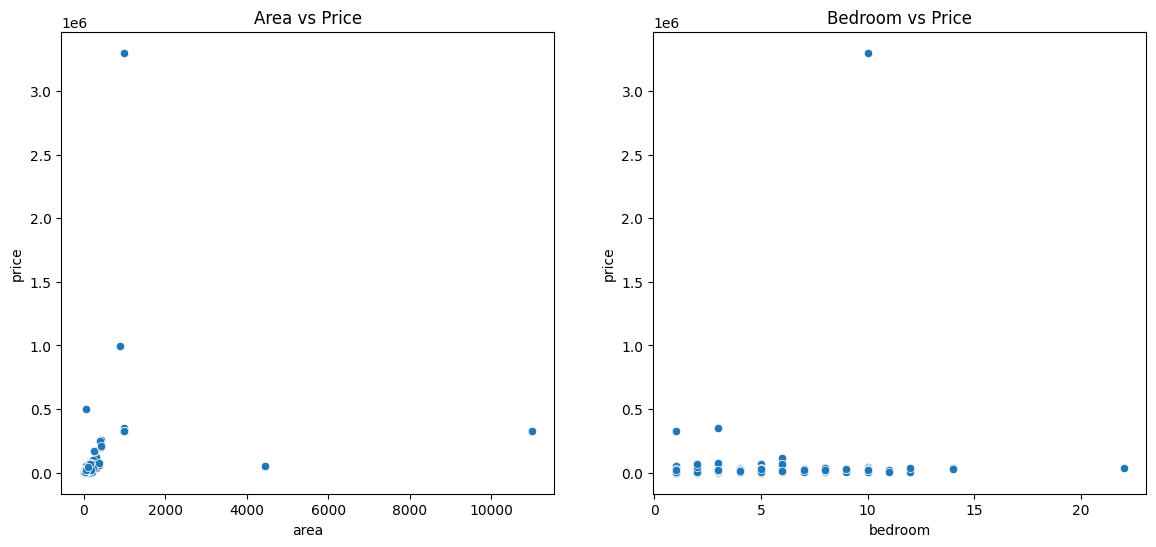

In [36]:
# Vẽ biểu đồ xu hướng phân tích mối quan hệ giữa giá nhà với diện tích, giá nhà với số lượng phòng ngủ
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='area', y='price', data=df, ax=axs[0])
sns.scatterplot(x='bedroom', y='price', data=df, ax=axs[1])
axs[0].set_title('Area vs Price')
axs[1].set_title('Bedroom vs Price')
plt.show()

In [ ]:
# Nhận xét:
  # qua biểu đồ mối quan hệ giữa giá nhà và diện tích có xu hướng nhà càng rộng thì giá càng cao, tuy nhiên, biểu đồ có những giá trị chưa thực sự đúng với xu hướng chung
  # qua biểu đồ mối quan hệ giữa giá nhà và số lượng phòng ngủ có xu hướng số lượng phòng ngủ càng nhiều thì giá càng cao,
  # tuy nhiên, với mặt bằng chung của xu hướng thì vẫn có những giá trị chưa rõ ràng

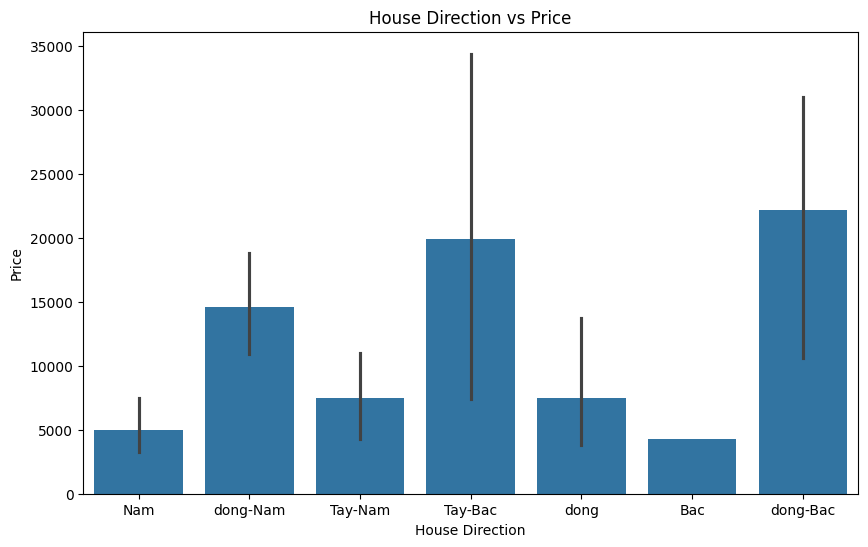

In [38]:
# Vẽ biểu đồ phân bố thể hiện phân bố của giá nhà theo các hướng
plt.figure(figsize=(10, 6))
sns.barplot(x='house_direction', y='price', data=df)
plt.xlabel('House Direction')
plt.ylabel('Price')
plt.title('House Direction vs Price')
plt.show()

In [ ]:
# Nhận xét:
  # qua biểu đồ mối quan hệ giữa giá nhà và hướng nhà ta có thể thấy, các hướng nhà có giá cao và rất cao phổ biến là tây bắc và đông bắc

Text(0.5, 1.0, 'House Direction Distribution')

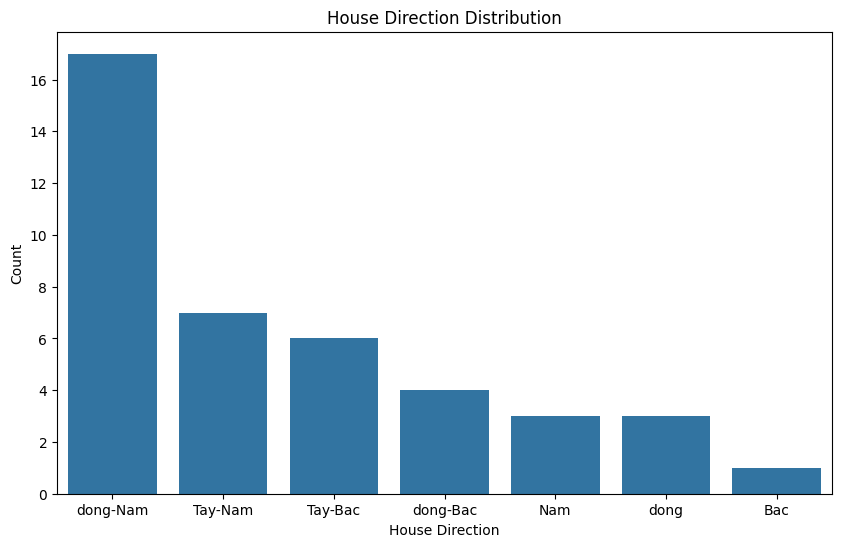

In [43]:
# Vẽ biểu đồ tần số để đếm số nhà ở mỗi hướng nhà
house_direction_counts = df['house_direction'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=house_direction_counts.index, y=house_direction_counts.values)
plt.xlabel('House Direction')
plt.ylabel('Count')
plt.title('House Direction Distribution')

In [ ]:
# Nhận xét:
  # qua biểu đồ mối quan hệ giữa số lượng nhà và hướng nhà ta có thể thấy, số lượng nhà tập trung mạnh ở hướng đông nam và giảm dần về các hướng còn lại, đặc biệt là hướng bắc

Text(0.5, 1.0, 'House Direction vs Price')

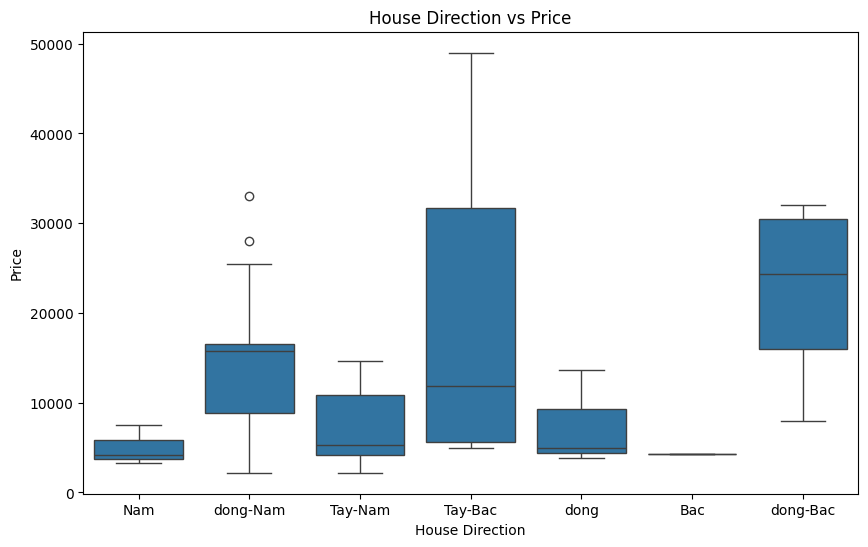

In [45]:
# Vẽ biểu đồ boxplot thể hiện phân bố của giá nhà theo các hướng
plt.figure(figsize=(10, 6))
sns.boxplot(x='house_direction', y='price', data=df)
plt.xlabel('House Direction')
plt.ylabel('Price')
plt.title('House Direction vs Price')

In [ ]:
# Nhận xét:
  # qua biểu đồ mối quan hệ giữa giá nhà và hướng nhà ta có thể thấy, các hướng nhà có giá cao và rất cao phổ biến là tây bắc và đông bắc,
  # trung vị của hướng đông bắc cao hơn hẳn so với các hướng còn lại tuy nhiên giá nhà ở đây nhìn chung lại ko cao